In [21]:
# Dependencies

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import numpy as np
import pandas as pd
import requests
from census import Census
import gmaps
from config import (gkey)
import datetime

# Configure gmaps
gmaps.configure(api_key=gkey)

In [47]:
shootingdata = pd.read_csv("./Resources/shotspotterdata.csv")
shootingdata.head()

,ID,Type,Date,Source,Lat (100),Lon (100),Time,Hours,Sunday to Saturday,Unnamed: 9
0,5D69913,Multiple_Gunshots,01/01/17,WashingtonDC5D,38.909,-76.986,0:00:06,0,1,NaN
1,6D174826,Multiple_Gunshots,01/01/17,WashingtonDC6D,38.886,-76.951,0:00:09,0,1,NaN
2,4D58125,Multiple_Gunshots,01/01/17,WashingtonDC4D,38.950,-77.025,0:00:12,0,1,NaN
3,5D69915,Multiple_Gunshots,01/01/17,WashingtonDC5D,38.927,-76.974,0:00:29,0,1,NaN
4,4D58126,Multiple_Gunshots,01/01/17,WashingtonDC4D,38.943,-77.016,0:00:36,0,1,NaN


In [48]:
shootingdata = shootingdata.rename(columns={"Source": "Deparment", "Lat (100)": "latitude", "Lon (100)": "longitude"})
shootingdata.columns

Index(['ID', 'Type', 'Date', 'Deparment', 'latitude', 'longitude', 'Time',
       'Hours', 'Sunday to Saturday', 'Unnamed: 9'],
      dtype='object')

In [49]:
shootingdata.head()

,ID,Type,Date,Deparment,latitude,longitude,Time,Hours,Sunday to Saturday,Unnamed: 9
0,5D69913,Multiple_Gunshots,01/01/17,WashingtonDC5D,38.909,-76.986,0:00:06,0,1,NaN
1,6D174826,Multiple_Gunshots,01/01/17,WashingtonDC6D,38.886,-76.951,0:00:09,0,1,NaN
2,4D58125,Multiple_Gunshots,01/01/17,WashingtonDC4D,38.950,-77.025,0:00:12,0,1,NaN
3,5D69915,Multiple_Gunshots,01/01/17,WashingtonDC5D,38.927,-76.974,0:00:29,0,1,NaN
4,4D58126,Multiple_Gunshots,01/01/17,WashingtonDC4D,38.943,-77.016,0:00:36,0,1,NaN


In [50]:

locations = shootingdata[['latitude', 'longitude']]

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,  
                                 dissipating=False, max_intensity=1,
                                 point_radius = 0.004)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 0.004
heat_layer.point_radius = 0.004

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
df_new = shootingdata.loc[:,['Deparment','ID','Type']]
shotsByDeparment = df_new.groupby(['Deparment','Type'])
shotsByDeparment.head()

,Deparment,ID,Type
0,WashingtonDC5D,5D69913,Multiple_Gunshots
1,WashingtonDC6D,6D174826,Multiple_Gunshots
2,WashingtonDC4D,4D58125,Multiple_Gunshots
3,WashingtonDC5D,5D69915,Multiple_Gunshots
4,WashingtonDC4D,4D58126,Multiple_Gunshots
5,WashingtonDC3D,3D61609,Gunshot_or_Firecracker
6,WashingtonDC7D,7D215868,Multiple_Gunshots
7,WashingtonDC3D,3D61613,Single_Gunshot
8,WashingtonDC5D,5D69916,Multiple_Gunshots
9,WashingtonDC4D,4D58135,Multiple_Gunshots


In [52]:

sum_it_up = shotsByDeparment.count()
sum_it_up


ID
Deparment      Type                        
WashingtonDC1D Gunshot_or_Firecracker    18
               Multiple_Gunshots         88
               Single_Gunshot            55
WashingtonDC3D Gunshot_or_Firecracker    27
               Multiple_Gunshots         91
               Single_Gunshot            54
WashingtonDC4D Gunshot_or_Firecracker    30
               Multiple_Gunshots        115
               Single_Gunshot            78
WashingtonDC5D Gunshot_or_Firecracker    76
               Multiple_Gunshots        394
               Single_Gunshot           162
WashingtonDC6D Gunshot_or_Firecracker   201
               Multiple_Gunshots       1382
               Single_Gunshot           603
WashingtonDC7D Gunshot_or_Firecracker   207
               Multiple_Gunshots       1635
               Single_Gunshot           738

In [53]:
District1 = "WashingtonDC1D"
District3 = "WashingtonDC3D"
District4 = "WashingtonDC4D"
District5 = "WashingtonDC5D"
District6 = "WashingtonDC6D"
District7 = "WashingtonDC7D"

d1 = sum_it_up.loc[District1]
d3 = sum_it_up.loc[District3]
d4 = sum_it_up.loc[District4]
d5 = sum_it_up.loc[District5]
d6 = sum_it_up.loc[District6]
d7 = sum_it_up.loc[District7]
shots = d1.keys()

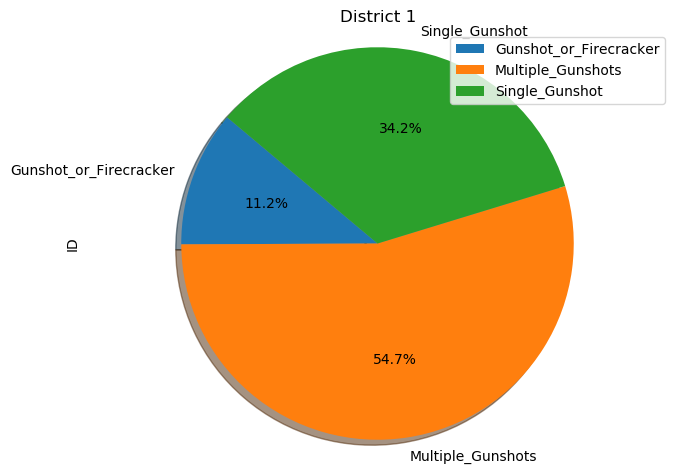

In [54]:
district1_pie = d1.plot(kind="pie", y= shots , title=("District 1" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

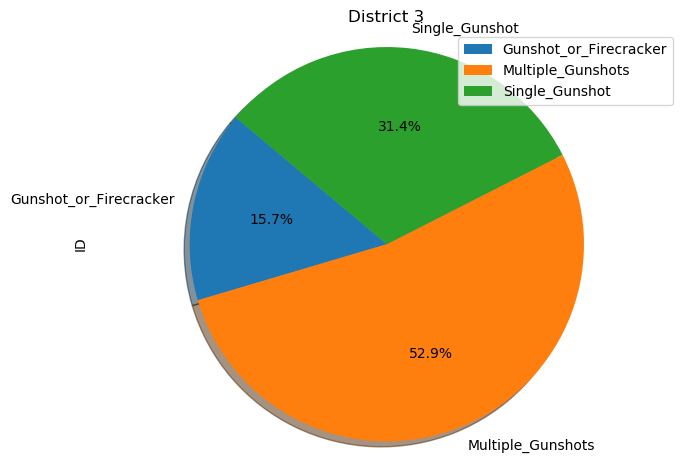

In [55]:
district1_pie = d3.plot(kind="pie", y= shots , title=("District 3" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

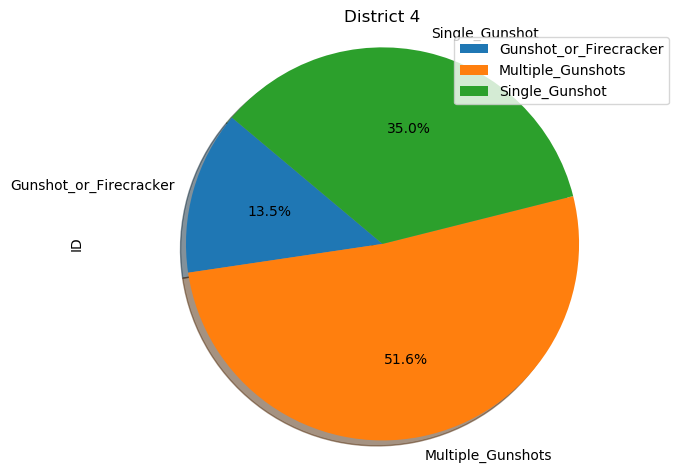

In [56]:
district1_pie = d4.plot(kind="pie", y= shots , title=("District 4" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

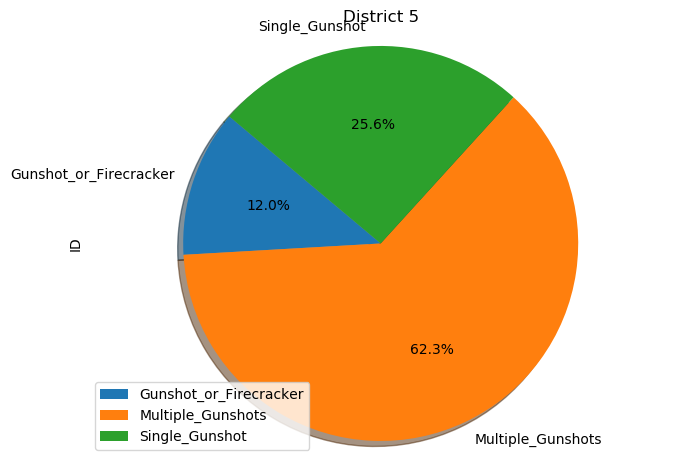

In [57]:
district1_pie = d5.plot(kind="pie", y= shots , title=("District 5" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

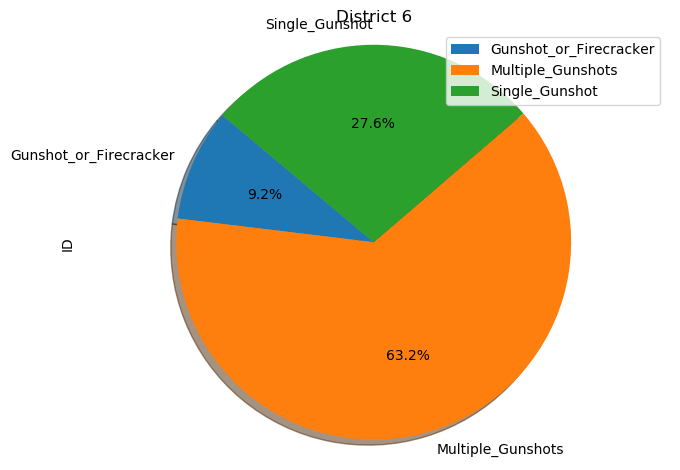

In [58]:
district1_pie = d6.plot(kind="pie", y= shots , title=("District 6" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

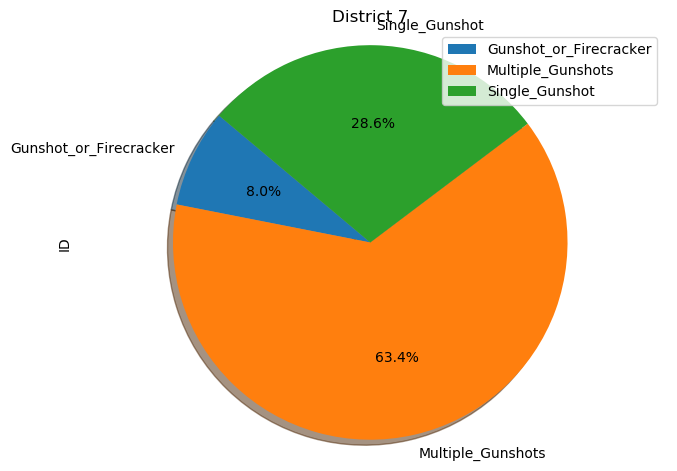

In [59]:
district1_pie = d7.plot(kind="pie", y= shots , title=("District 7" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

In [60]:
df_new2 = shootingdata.loc[:,['Deparment','ID']]
shotstotal = df_new.groupby(['Deparment'])

shotstotal.head()

sum_it_up2 = shotstotal.count()
sum_it_up2
total = sum_it_up2.loc

In [61]:
# Rename DF for following code
df = shootingdata

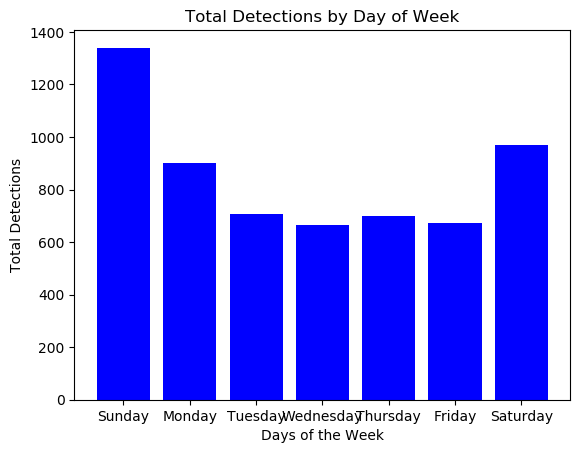

In [62]:
# Create bar chart to compare amount of dections on days different days of the week
day_totals = df.groupby('Sunday to Saturday')['ID'].count()
day_d = {"Total Detections by Day of Week": day_totals}
day_df = pd.DataFrame(data=day_d)

x_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_totals = day_df['Total Detections by Day of Week']
plt.bar(x_labels, day_totals, color="b", align="center")

plt.title("Total Detections by Day of Week")
plt.xlabel("Days of the Week")
plt.ylabel("Total Detections")

plt.savefig("Resources/DetectionsbyDay.svg")
plt.savefig("Resources/DetectionsbyDay.png")
plt.show()

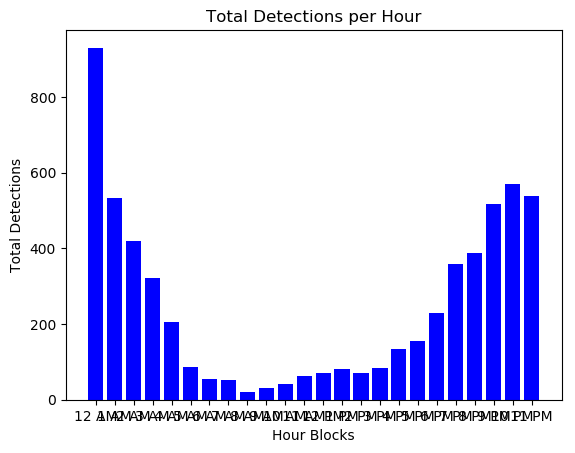

In [63]:
# Create bar chart to compare dections by hour
hour_totals = df.groupby('Hours')['ID'].count()
hour_d = {"Total Detections per hour": hour_totals}
hour_df = pd.DataFrame(data=hour_d)

x_labels = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', 
          '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', 
          '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', 
          '9 PM', '10 PM', '11 PM']

totals = hour_df['Total Detections per hour']
plt.bar(x_labels, totals, color="b", align="center")

plt.title("Total Detections per Hour")
plt.xlabel("Hour Blocks")
plt.ylabel("Total Detections")

plt.savefig("Resources/DetectionsbyHour.svg")
plt.savefig("Resources/DetectionsbyHour.png")
plt.show()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


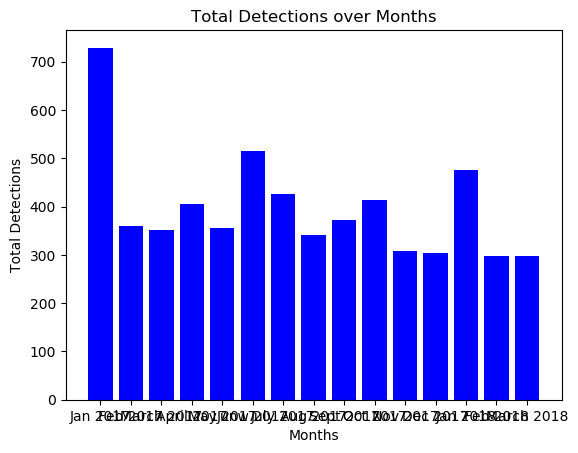

In [64]:
# Create bar chart to compare dectections made throughout each month of the data set 
df["_id"] = pd.to_datetime(df["Date"])

df['Date'] = df["_id"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["Date"],inplace=True)

d2 = df['ID'].resample('M', how='count')

date_df = pd.DataFrame(data=d2)

x_labels = ["Jan 2017", "Feb 2017", "March 2017", "April 2017", 
            "May 2017", "Junw 2017", "July 2017", "Aug 2017", 
            "Sept 2017", "Oct 2017", "Nov 2017", "Dec 2017", 
            "Jan 2018", "Feb 2018", "March 2018"]

mon_totals = date_df['ID']
plt.bar(x_labels, mon_totals, color="b", align="center")

plt.title("Total Detections over Months")
plt.xlabel("Months")
plt.ylabel("Total Detections")

plt.savefig("Resources/DetectionsbyMonth.svg")
plt.savefig("Resources/DetectionsbyMonth.png")
plt.show()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


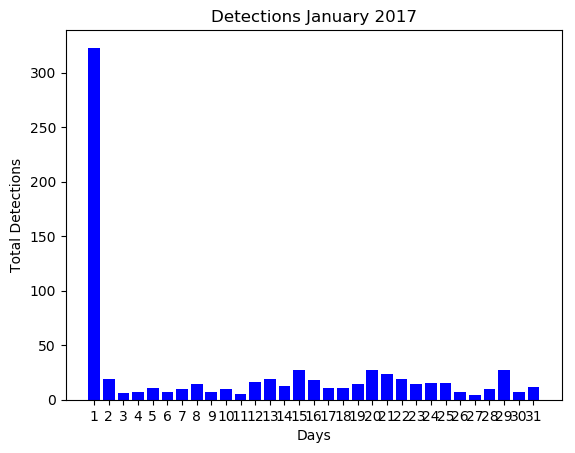

In [65]:
# Bar chart to compare each day in Jan 2017
# Create dataframe for just Jan 2017
jan2017 = df.groupby('Date')['ID'].count()
jan17_d = {"Detections Jan 2017": jan2017}
jan2017_df = pd.DataFrame(data=jan17_d)
jan2017_df = jan2017_df.reset_index()
jan2017_df.head()


crit1 = df['Date'].map(lambda x : x.year == 2017)
crit2 = df['Date'].map(lambda x : x.month == 1)

df2 = df[crit1 & crit2]

d3 = df2['ID'].resample('D', how='count')

jan_df = pd.DataFrame(data=d3)
jan_df = jan_df.reset_index()
jan_df.head()

day_totals = jan_df['ID']
x_axis = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", 
          "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", 
          "27", "28", "29", "30", "31"]

plt.bar(x_axis, day_totals, color="b", align="center")

plt.title("Detections January 2017")
plt.xlabel("Days")
plt.ylabel("Total Detections")

plt.savefig("Resources/Jan2017.svg")
plt.savefig("Resources/Jan2017.png")
plt.show()

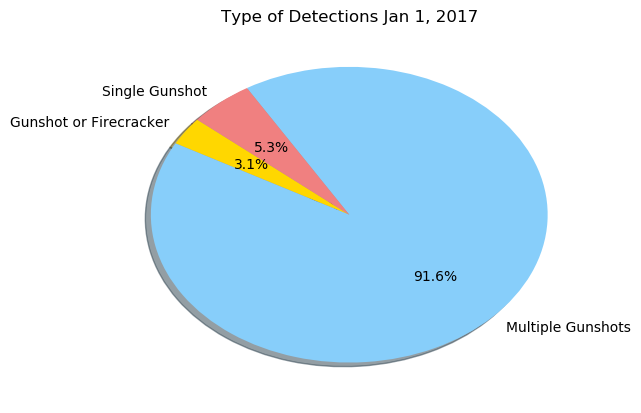

In [66]:
# Pie chart for Jan 1 2017
# create dataframe for just jan 1 2017 

crit3 = df['Date'].map(lambda x : x.day == 1)

df3 = df[crit1 & crit2 & crit3]

type_totals = df3.groupby('Type')['ID'].count()
total_detect = type_totals.sum()
percent_type = (type_totals / total_detect)*100

d4 = {"Percent Type" : percent_type}
df4 = pd.DataFrame(data=d4)

# The colors of each section of the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']

# set labels
labels = ['Gunshot or Firecracker', 'Multiple Gunshots', 'Single Gunshot']

# plot chart
plt.pie(df4['Percent Type'], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title
plt.title("Type of Detections Jan 1, 2017")

# Save Figure
plt.savefig("Resources/Jan012017percenttype.svg")
plt.savefig("Resources/Jan012017percenttype.png")

# Show Figure
plt.show()

In [42]:
data_type = pd.read_csv("Avg_shot.csv")
type_new = data_type.set_index('Month')
type_new

FileNotFoundError: File b'Avg_shot.csv' does not exist

In [43]:
type_new.plot.bar()
plt.tight_layout()
#plt.savefig("avg_type.svg")
plt.show()

NameError: name 'type_new' is not defined

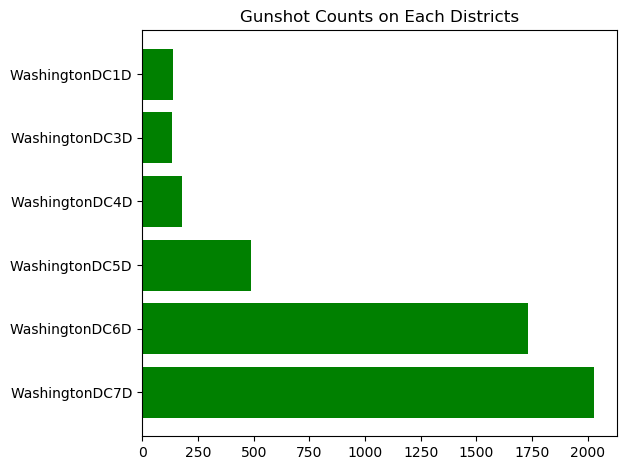

In [44]:
plt.rcdefaults()
fig, ax = plt.subplots()

people = ('WashingtonDC1D', 'WashingtonDC3D', 'WashingtonDC4D', 'WashingtonDC5D', 'WashingtonDC6D','WashingtonDC7D')
y_pos = np.arange(len(people))
performance = [139,132.5,177.5,487,1734,2028]

ax.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('ShotSpotter')
ax.set_title('Gunshot Counts on Each Districts')
plt.tight_layout()
#plt.savefig("shot_count.png")
#plt.savefig("shot_count.svg")
plt.show()